In [1]:
import os
import pandas as pd
import h2o
from h2o.automl import H2OAutoML

h2o.init(max_mem_size='12G')
print(h2o.__version__)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "23.0.1" 2024-10-15; OpenJDK Runtime Environment Homebrew (build 23.0.1); OpenJDK 64-Bit Server VM Homebrew (build 23.0.1, mixed mode, sharing)
  Starting server from /Users/ralf/Projects/learning-projects/datascience-bootcamp/sep24_bds_int_medical/.venv/lib/python3.12/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmpweatkl_r
  JVM stdout: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmpweatkl_r/h2o_ralf_started_from_python.out
  JVM stderr: /var/folders/g7/z7m625rj50d5ptztzplh4wgc0000gn/T/tmpweatkl_r/h2o_ralf_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/Berlin
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.6
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_ralf_a03y0m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,11.98 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


3.46.0.6


In [2]:
%%time

import warnings
warnings.filterwarnings('ignore')

CPU times: user 19 μs, sys: 6 μs, total: 25 μs
Wall time: 26 μs


In [3]:
%%time

train_data_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'train.csv')
train_data = pd.read_csv(train_data_file, index_col=0, low_memory=False)
extra_train_data_file = os.path.join('..', '..', '..', '..', 'data', 'interim', 'all_test_3h.csv')
extra_train_data = pd.read_csv(extra_train_data_file, low_memory=False)

all_train_data = pd.concat([train_data, extra_train_data], axis=0)
all_train_data.head()

CPU times: user 8.55 s, sys: 1.42 s, total: 9.97 s
Wall time: 10.3 s


,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [4]:
from pipelines import preprocessing_pipeline

all_train_data = preprocessing_pipeline.fit_transform(all_train_data)
all_train_data.head()

,bg-3:00,bg-2:55,bg-2:50,bg-2:45,bg-2:40,bg-2:35,bg-2:30,bg-2:25,bg-2:20,bg-2:15,...,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00,hour
p01_0,13.9,14.000000,14.100000,14.2,14.200000,14.200000,14.2,14.600000,15.000000,15.4,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,13.4,06
p01_1,14.2,14.200000,14.200000,14.2,14.600000,15.000000,15.4,16.000000,16.600000,17.2,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,12.8,06
p01_2,14.2,14.600000,15.000000,15.4,16.000000,16.600000,17.2,17.533333,17.866667,18.2,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,15.5,06
p01_3,15.4,16.000000,16.600000,17.2,17.533333,17.866667,18.2,18.266667,18.333333,18.4,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,14.8,06
p01_4,17.2,17.533333,17.866667,18.2,18.266667,18.333333,18.4,18.266667,18.133333,18.0,...,6.07,6.07,6.07,6.07,6.07,6.07,6.07,6.07,12.7,07


In [5]:
%%time

train_h2o = h2o.H2OFrame(all_train_data)
train_h2o.head()

y = 'bg+1:00'
x = [col for col in train_h2o.columns if col != y]
print(x)
print(y)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
['bg-3:00', 'bg-2:55', 'bg-2:50', 'bg-2:45', 'bg-2:40', 'bg-2:35', 'bg-2:30', 'bg-2:25', 'bg-2:20', 'bg-2:15', 'bg-2:10', 'bg-2:05', 'bg-2:00', 'bg-1:55', 'bg-1:50', 'bg-1:45', 'bg-1:40', 'bg-1:35', 'bg-1:30', 'bg-1:25', 'bg-1:20', 'bg-1:15', 'bg-1:10', 'bg-1:05', 'bg-1:00', 'bg-0:55', 'bg-0:50', 'bg-0:45', 'bg-0:40', 'bg-0:35', 'bg-0:30', 'bg-0:25', 'bg-0:20', 'bg-0:15', 'bg-0:10', 'bg-0:05', 'bg-0:00', 'insulin-3:00', 'insulin-2:55', 'insulin-2:50', 'insulin-2:45', 'insulin-2:40', 'insulin-2:35', 'insulin-2:30', 'insulin-2:25', 'insulin-2:20', 'insulin-2:15', 'insulin-2:10', 'insulin-2:05', 'insulin-2:00', 'insulin-1:55', 'insulin-1:50', 'insulin-1:45', 'insulin-1:40', 'insulin-1:35', 'insulin-1:30', 'insulin-1:25', 'insulin-1:20', 'insulin-1:15', 'insulin-1:10', 'insulin-1:05', 'insulin-1:00', 'insulin-0:55', 'insulin-0:50', 'insulin-0:45', 'insulin-0:40', 'insulin-0:35', 'insulin-0:30', '

In [6]:
%%time

aml = H2OAutoML(max_models=500, seed=1000, max_runtime_secs=3600)
aml.train(x=x, y=y, training_frame=train_h2o)

AutoML progress: |
21:00:33.789: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
CPU times: user 16.1 s, sys: 4.6 s, total: 20.7 s
Wall time: 1h 1s


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_1_AutoML_1_20241114_210033


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    302                302                         1.12693e+06            0            15           11.9205       1             1403          291.639

ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.8724857640175112
RMSE: 1.3683880166157227
MAE: 1.0151766337270847
RMSLE: 0.15063615921628704
Mean Residual Deviance: 1.8724857640175112

ModelMetricsRegression: gbm
** Reported on cross-validation data. **

MSE: 2.8385472114057526
RMSE: 1.6847988637833753
MAE: 1.237811696813477
RMSLE: 0.1818545909859417
Mean Residual Deviance: 2.8385472114057526

Cross-Validation Metrics Summary: 
                        mean      sd           cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  --------  -----------  ------------  ------------  ------------  ------------  ------------
aic                     nan       0            nan           nan           nan           nan           nan
loglikelihood           nan       0            nan           nan           nan           nan           nan
mae                     1.23781   0.00522096   1.2316        1.23529       1.23768       1.24577       1.23872
mean_residual_deviance  2.83855   0.0223406    2.80838       2.82974       2.84342       2.8698        2.8414
mse                     2.83855   0.0223406    2.80838       2.82974       2.84342       2.8698        2.8414
r2                      0.704819  0.00251494   0.708287      0.705762      0.703732      0.701472      0.704839
residual_deviance       2.83855   0.0223406    2.80838       2.82974       2.84342       2.8698        2.8414
rmse                    1.68479   0.00662941   1.67582       1.68218       1.68624       1.69405       1.68565
rmsle                   0.181854  0.000679996  0.180964      0.181509      0.182047      0.182798      0.181951

Scoring History: 
     timestamp            duration          number_of_trees    training_rmse       training_mae        training_deviance
---  -------------------  ----------------  -----------------  ------------------  ------------------  -------------------
     2024-11-14 21:08:15  7 min 24.533 sec  0.0                3.10102009887537    2.4115223569786006  9.616325653629008
     2024-11-14 21:08:18  7 min 27.234 sec  5.0                2.4466117692357234  1.9024763635758963  5.985909149362756
     2024-11-14 21:08:20  7 min 29.692 sec  10.0               2.132443436141838   1.638794552986588   4.54731500834441
     2024-11-14 21:08:23  7 min 31.992 sec  15.0               1.97581494654788    1.4957921092389237  3.903844703002002
     2024-11-14 21:08:25  7 min 34.123 sec  20.0               1.8878303683179263  1.4134408984840068  3.5639034995433976
     2024-11-14 21:08:27  7 min 36.161 sec  25.0               1.8262130648188901  1.3576133456708959  3.335054158115204
     2024-11-14 21:08:29  7 min 38.041 sec  30.0               1.7864069461405794  1.3231880704974115  3.191249777219311
     2024-11-14 21:08:30  7 min 39.831 sec  35.0               1.7526664128421936  1.2963105017300813  3.071839554705123
     2024-11-14 21:08:32  7 min 41.529 sec  40.0               1.7276340866638162  1.2770197410753075  2.984719537402719
     2024-11-14 21:08:34  7 min 43.220 sec  45.0               1.703408031925042   1.2587864433896259  2.901598923226745
---  ---                  ---               ---                ---                 ---                 ---
     2024-11-14 21:09:36  8 min 45.099 sec  260.0              1.3683880166157227  1.0151766337270847  1.8724857640175112
     2024-11-14 21:09:

In [7]:
%%time

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

CPU times: user 1.76 ms, sys: 1.46 ms, total: 3.22 ms
Wall time: 4 ms


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
GBM_1_AutoML_1_20241114_210033,1.6848,2.83855,1.23781,0.181855,2.83855
GBM_3_AutoML_1_20241114_210033,1.79193,3.21103,1.32515,0.193333,3.21103
GBM_2_AutoML_1_20241114_210033,1.82482,3.32997,1.35032,0.196666,3.32997
DRF_1_AutoML_1_20241114_210033,1.85234,3.43116,1.36088,0.198897,3.43116
GLM_1_AutoML_1_20241114_210033,2.13739,4.56842,1.5934,nan,4.56842


In [8]:
%%time
test_file = os.path.join('..', '..', '..', '..', 'data', 'raw', 'test.csv')
test_data = h2o.import_file(test_file)

y_pred = aml.predict(test_data=test_data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
CPU times: user 49.4 ms, sys: 12.2 ms, total: 61.6 ms
Wall time: 1.88 s


In [9]:
import pandas as pd

sample_submission = pd.read_csv(os.path.join('..', '..', '..', '..', 'data', 'raw', 'sample_submission.csv'), index_col=0)

sample_submission['bg+1:00'] = y_pred.as_data_frame().values
sample_submission.to_csv(f'submission-{os.path.basename(os.getcwd())}.csv')


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
RMSE: 1.368387965436779
R2: 0.8052805533821127


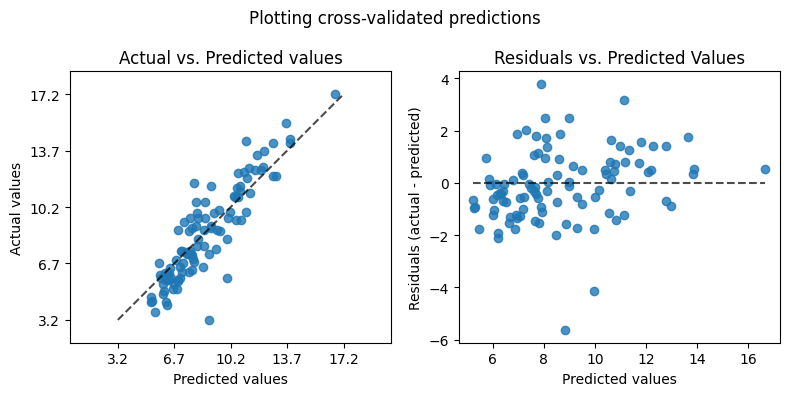

In [10]:
from sklearn.metrics import root_mean_squared_error, r2_score, PredictionErrorDisplay
import matplotlib.pyplot as plt

y_train = train_h2o[y].as_data_frame().values
y_pred = aml.leader.predict(train_h2o).as_data_frame().values

print(f'RMSE: {root_mean_squared_error(y_true=y_train, y_pred=y_pred)}')
print(f'R2: {r2_score(y_true=y_train, y_pred=y_pred)}')

fig, axs = plt.subplots(ncols=2, figsize=(8, 4))
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="actual_vs_predicted",
    subsample=100,
    ax=axs[0],
    random_state=0,
)
axs[0].set_title("Actual vs. Predicted values")
PredictionErrorDisplay.from_predictions(
    y_true=y_train,
    y_pred=y_pred,
    kind="residual_vs_predicted",
    subsample=100,
    ax=axs[1],
    random_state=0,
)
axs[1].set_title("Residuals vs. Predicted Values")
fig.suptitle("Plotting cross-validated predictions")
plt.tight_layout()
plt.show();

In [11]:
sample_submission

,bg+1:00
id,
p01_8459,8.630235
p01_8460,6.644844
p01_8461,7.451725
p01_8462,9.726761
p01_8463,7.307569
...,...
p24_256,6.482907
p24_257,9.481192
p24_258,7.253811
